## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 11: Portfolio Optimization**

Andrés C. Medina Sanhueza

Senior Data Scientist Engineer 

anmedinas@gmail.com

## 🍁 Formulación del Modelo de Markowitz

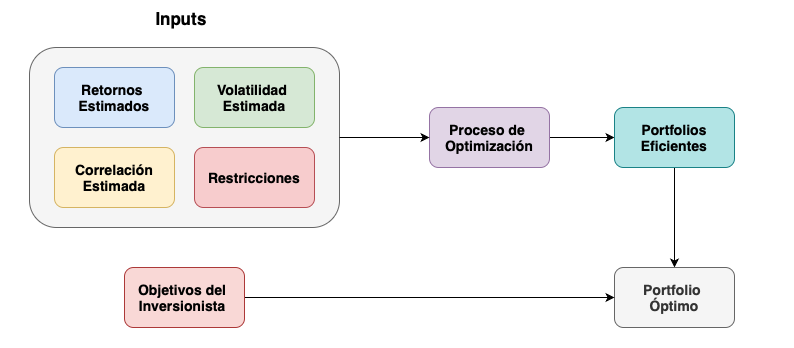

In [1]:
from IPython.display import Image
Image("proceso_optimizacion.png")

El modelo de optimización de media varianza propuesto por Markowitz comienza por considerar un número $N$ de activos con $N\in\mathbb{N}$ , retornos $r\in\mathbb{R}^{N}$ que están distribuidos normalmente con vector de medias $\mu\in\mathbb{R}^{N}$ y matriz de covarianzas $\Sigma\in\mathbb{R}^N \times\mathbb{R}^N$. 

El modelo, asume que la matriz $\Sigma$ es definida positiva. Definimos el vector de pesos del portofolio $w\in\mathbb{R}^N$, el retorno esperado $\mu_p = w_0^{\top} \mu $, el riesgo esperado del portfolio como $\sigma_p = w_0^{\top}\Sigma w_0$ 

Finalmente, cuando escogemos los activos, podemos fijar los valores $N$, $r$, $\mu$ y $\Sigma$ considerando un número de observaciones $t\in\mathbb{N}$, con lo cual, el problema de optimización de media varianza se puede plantear como cuatro problemas de optimización equivalentes:

### ☘️ Minimización de riesgo dado un nivel de rentabilidad

En la formulación clásica, el objetivo es encontrar la combinación de activos que minimice la varianza (riesgo) para un nivel dado de retorno esperado, o maximice el retorno esperado para un nivel dado de riesgo. El problema se plantea como una optimización cuadrática bajo restricciones lineales:

* Minimizacion de riesgo (varianza del portfolio) dado un retorno esperado
* Maximizacion del retorno esperado dado un nivel de riesgo (desviacion estandar)

Las restricciones básicas incluyen:

* Restricción de que la suma de las ponderaciones del portafolio sea igual a 1.
* Ponderaciones no negativas si se prohíbe el apalancamiento (solo posiciones largas).


\begin{equation*}
\begin{aligned}
    & \min_{w} w^{\top} \Sigma w \\
    & \text{st.} \\
    & \quad w^{\top} \mathbf{\mu} = \mu_p \quad \\
    & \quad \sum_{i=1}^{n}w_i = 1 \\
    & \quad w_i \geq 0\quad \forall i\in\mathbb{N}
\end{aligned}
\end{equation*}


Los términos `posición larga` y `posición corta` se refieren a las estrategias que un inversor adopta respecto a un activo financiero :

* `Long Position` (Posicion larga) significa que el inversor **compra** un activo con la expectativa de que su precio aumentara en el futuro. La estrategia, es que el inversor busca obtener beneficios de la apreciacion del activo. Si el precio del activo sube, el inversor puede venderlo a un precio mayor al que lo compro obteniendo una ganancia. En una cartera tradicional, se suele permitir solo posiciones largas, donde el objetivo es maximizar la rentabilidad invirtiendo en activos cuyo valor se espera que aumente.

* `Short Position` (Posicion corta) significa que el inversor **vende** un activo que no posee, generalmente pidiéndolo prestado, con la expectativa de que su precio disminuirá en el futuro. El inversor busca beneficiarse de la depreciación del activo. Si el precio del activo baja, el inversor puede recomprarlo a un precio inferior al que lo vendió inicialmente, devolviendo el activo prestado y obteniendo una ganancia de la diferencia. En carteras más complejas, como las estrategias de fondos de cobertura (hedge funds) o portafolios de venta en corto, se permiten posiciones cortas para aprovechar la caída de activos o para cubrir riesgos de otros activos en la cartera.

### 🍂 Maximización de Rentabilidad dado un nivel de Riesgo

Este problema busca encontrar las ponderaciones óptimas $w$ que maximicen el retorno esperado del portafolio, respetando una restricción sobre el riesgo del portafolio (la varianza o desviación estándar del mismo). La restricción cuadrática garantiza que el portafolio no supere un nivel de riesgo predeterminado.

Este enfoque es útil cuando un inversionista está dispuesto a asumir un nivel específico de riesgo, pero desea obtener la mayor rentabilidad posible dentro de ese umbral de riesgo.

\begin{equation*}
\begin{aligned}
    & \max_{w} w^{\top} \mu  \\
    & \text{st.} \\
    & \quad w^{\top} \Sigma w \leq \sigma_p^2 \quad \\
    & \quad \sum_{i=1}^{n}w_i = 1 \\
    & \quad w_i \geq 0\quad \forall i\in\mathbb{N}
\end{aligned}
\end{equation*}


### 🐞 Maximización de una función de utilidad que exhibe aversión al riesgo 

El problema de maximización de una función de utilidad que exhibe aversión al riesgo se plantea utilizando una función de utilidad cuadrática o una función de utilidad exponencial. Estas funciones son comunes para modelar la aversión al riesgo, donde el objetivo es maximizar la utilidad esperada del inversionista, que tiene en cuenta tanto el retorno esperado como el riesgo (varianza o volatilidad).

En este enfoque, la utilidad del inversionista está dada por una función cuadrática que penaliza la varianza, lo que refleja su aversión al riesgo.

\begin{equation*}
\begin{aligned}
    & \max_{w} \mathbb{E}\left[U(w)\right] = w^{\top}\mu  - \frac{\lambda}{2} w^{\top} \Sigma w \\
    & \text{st.} \\
    & \quad \sum_{i=1}^{n}w_i = 1 \\
    & \quad w_i \geq 0\quad \forall i\in\mathbb{N} \\
    & \quad \lambda\in [0,\infty)
\end{aligned}
\end{equation*}


Donde: 

* $w$ es el vector de ponderaciones del portafolio (en la restriccion, $w_i \geq 0$ indican posiciones largas)
* $\mu$ es el vector de retornos esperados de cada activo.
* $\Sigma$ es la matriz de covarianzas entre los activos (representa el riesgo o varianza).
* $\lambda$ es el coeficiente de aversión al riesgo del inversionista (a mayor $\lambda$
mayor aversión al riesgo). Este indica qué tanto el inversionista prefiere minimizar el riesgo frente a maximizar el retorno).

### 📒 Maximización del ratio de retorno ajustado al riesgo

La maximización del ratio de retorno ajustado al riesgo es un problema comúnmente planteado en términos de `maximizar el Ratio de Sharpe`, que mide el retorno esperado del portafolio ajustado por su riesgo. Este ratio es una métrica fundamental en la teoría moderna de portafolios y ayuda a los inversionistas a entender cuánta rentabilidad están obteniendo por cada unidad de riesgo asumido.


\begin{equation*}
\begin{aligned}
    & \max_{w} \frac{w^{\top}\mu  - r_f}{\sqrt{w^{\top} \Sigma w}}   \\
    & \text{st.} \\
    & \quad \sum_{i=1}^{n}w_i = 1 \\
    & \quad w_i \geq 0\quad \forall i\in\mathbb{N} 
\end{aligned}
\end{equation*}


Donde : 

* $w$ es el vector de ponderaciones del portafolio.
* $\mu$ es el retorno esperado de cada activo.
* $r_f$ es la tasa libre de riesgo
* $\Sigma$ es la matriz de covarianzas entre los activos que refleja el riesgo del portfolio.
* $w^{\top}r - r_f$ es el exceso de retorno del portfolio sobre la tasa libre de riesgo.
* $\sqrt{w^{\top}\Sigma w}$ es la desviacion estandar del portfolio que mide el riesgo total.

El problema anterior, es cuasi-convexo por lo que puede ser resuelto con programas de programacion convexa como [cvxpy](https://www.cvxpy.org/examples/index.html); sin embargo, puede ser transformado en un problema de programacion cuadratica mediante transformaciones, una de ellas es la de Charnes y Cooper siempre y cuando, se asuma que 
$\mu w^{\top} - r_f > 0$, de esta forma, el problema toma la siguiente forma:

$
\begin{equation}
\begin{aligned}
    & \min_{w} y\Sigma y^{\top} \\
    & \text{st.} \\
    & \quad y^{\top}\mu  - r_f k = 1 \\
    & \quad \sum_{i=1}^{n}y_i = k \\
    & \quad k \geq 0 \\
    & \quad y_i \geq 0\quad \forall i\in\mathbb{N} 
\end{aligned}
\end{equation}
$

Donde el portfolio óptimo se obtiene al hacer la transformacion $w = y/k$

---

**`Recordatorio:`** El `Ratio de Sharpe` es una medida que se utiliza para evaluar la relación entre el rendimiento esperado de un portfolio y su riesgo. Se define como la diferencia entre el rendimiento del portfolio y el rendimiento de un activo libre de riesgo, dividido por la desviación estandar de los rendimientos del portfolio. Esto, es útil para comparar el rendimiento ajustado por riesgo de difernetes portfolios o activos. 

La fórmula es la siguiente : 
$
\begin{equation}
S = \frac{\mu_p - r_f}{\sigma_p}
\end{equation}
$

Donde $S$ es el ratio de sharpe, $\mu_p$ es el rendimiento esperado del portfolio, $r_f$ es el rendimiento del activo libre de riesgo (como bonos del tesoro) y $\sigma_p$ es la desviación estandar de los rendimientos del portfolio que mide la volatilidad. En un contexto de optimizacion de portfolio, el `Ratio de Sharpe` permite evaluar qué tanto rendimiento adicional genera el portafolio por cada unidad adicional de riesgo asumido. En un contexto de optimización, se utiliza para:

* Maximizar la rentabilidad ajustada por riesgo: Los inversionistas buscan aumentar el Ratio de Sharpe, maximizando el rendimiento esperado por unidad de riesgo.

* Comparar diferentes portafolios: Permite comparar portafolios que podrían tener diferentes niveles de riesgo y rendimiento, ajustando ambos factores a una métrica común.
Un Ratio de Sharpe más alto indica que el portafolio está logrando un rendimiento más alto por cada unidad de riesgo, lo que lo hace más atractivo en términos de eficiencia riesgo-retorno.

### 💻 Implementación Computacional

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Configuro el background del plot a dark
sns.set_style("dark")
warnings.simplefilter("ignore")

##### Descarga Series Históricas

Considero un portfolio de 24 acciones muy diversificadas.

| Ticker | Empresa                          | Descripción                                      |
|--------|----------------------------------|--------------------------------------------------|
| IR     | Ingersoll Rand Inc.             | Empresa de tecnología industrial.                 |
| EXC    | Exelon Corporation               | Compañía de servicios públicos de energía.       |
| APH    | Aphria Inc.                     | Productor de cannabis.                           |
| LOW    | Lowe's Companies, Inc.          | Minorista de productos de mejoras para el hogar. |
| JPM    | JPMorgan Chase & Co.            | Banco de inversión y servicios financieros.      |
| SBUX   | Starbucks Corporation            | Cadena de cafeterías.                            |
| DHI    | D.R. Horton, Inc.               | Constructora de viviendas.                        |
| MCHP   | Microchip Technology Inc.       | Fabricante de semiconductores.                   |
| NTRS   | Northern Trust Corporation       | Servicios financieros y de gestión de activos.   |
| CNP    | CenterPoint Energy, Inc.        | Compañía de servicios públicos de energía.       |
| M      | Macy's, Inc.                    | Minorista de grandes almacenes.                  |
| O      | Realty Income Corporation        | REIT (Real Estate Investment Trust) que invierte en propiedades comerciales. |
| CMI    | Cummins Inc.                    | Fabricante de motores y tecnología de energía.   |
| EQT    | EQT Corporation                  | Productor de gas natural.                        |
| ECL    | Ecolab Inc.                     | Empresa de servicios y productos químicos.      |
| HRB    | H&R Block, Inc.                 | Servicios de preparación de impuestos.           |
| GM     | General Motors Company           | Fabricante de automóviles.                        |
| NOV    | National Oilwell Varco, Inc.    | Proveedor de productos y servicios para la industria del petróleo y gas. |
| SWK    | Stanley Black & Decker, Inc.    | Fabricante de herramientas y productos de seguridad. |
| UNP    | Union Pacific Corporation        | Ferrocarril de carga.                            |
| COF    | Capital One Financial Corporation | Banco y compañía de servicios financieros.       |
| CMS    | CMS Energy Corporation           | Compañía de servicios públicos de energía.       |
| EMN    | Eastman Chemical Company         | Fabricante de productos químicos.                |
| AAPL   | Apple Inc.                      | Empresa de tecnología y electrónica de consumo.  |


In [3]:
# Conjunto de Tickers para construir el Portafolio
tickers = ['IR', 'EXC', 'APH', 'LOW', 'JPM', 'SBUX',
           'DHI', 'MCHP', 'NTRS', 'M', 'O', 'CMI',
           'EQT', 'ECL', 'HRB', 'GM', 'NOV', 'SWK',
           'UNP', 'COF', 'CMS', 'EMN', 'AAPL']

# Ordeno los Tickers 
tickers.sort()

# Guardo el total de Tickers 
n = len(tickers)

start = '1999-12-01' # fecha inicio 
end = '2019-12-31'   # fecha termino 

# Descarga de Series historias (Precios de Cierre)
data = yf.download(tickers, start = start, end = end)["Close"]

# Agrupa los datos en intervalos de tiempo mensuales.
data = data.resample('M').last()

# Genera los Retornos 
returns = data.pct_change().dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  23 of 23 completed


##### Plot Series Históricas

<Figure size 2000x1300 with 0 Axes>

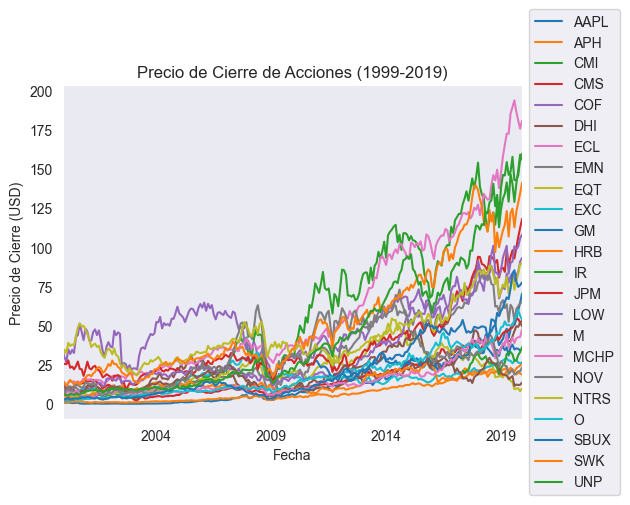

In [4]:
# Plotear Series de Precios 
fig = plt.figure(figsize = (20, 13))
data.plot()
plt.title('Precio de Cierre de Acciones (1999-2019)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend(tickers, loc='center left', bbox_to_anchor=(1, 0.5))  # Mueve la leyenda a la derecha
plt.tight_layout()  # Ajusta automáticamente el espacio del gráfico
plt.show()

##### Plot Retornos Históricos

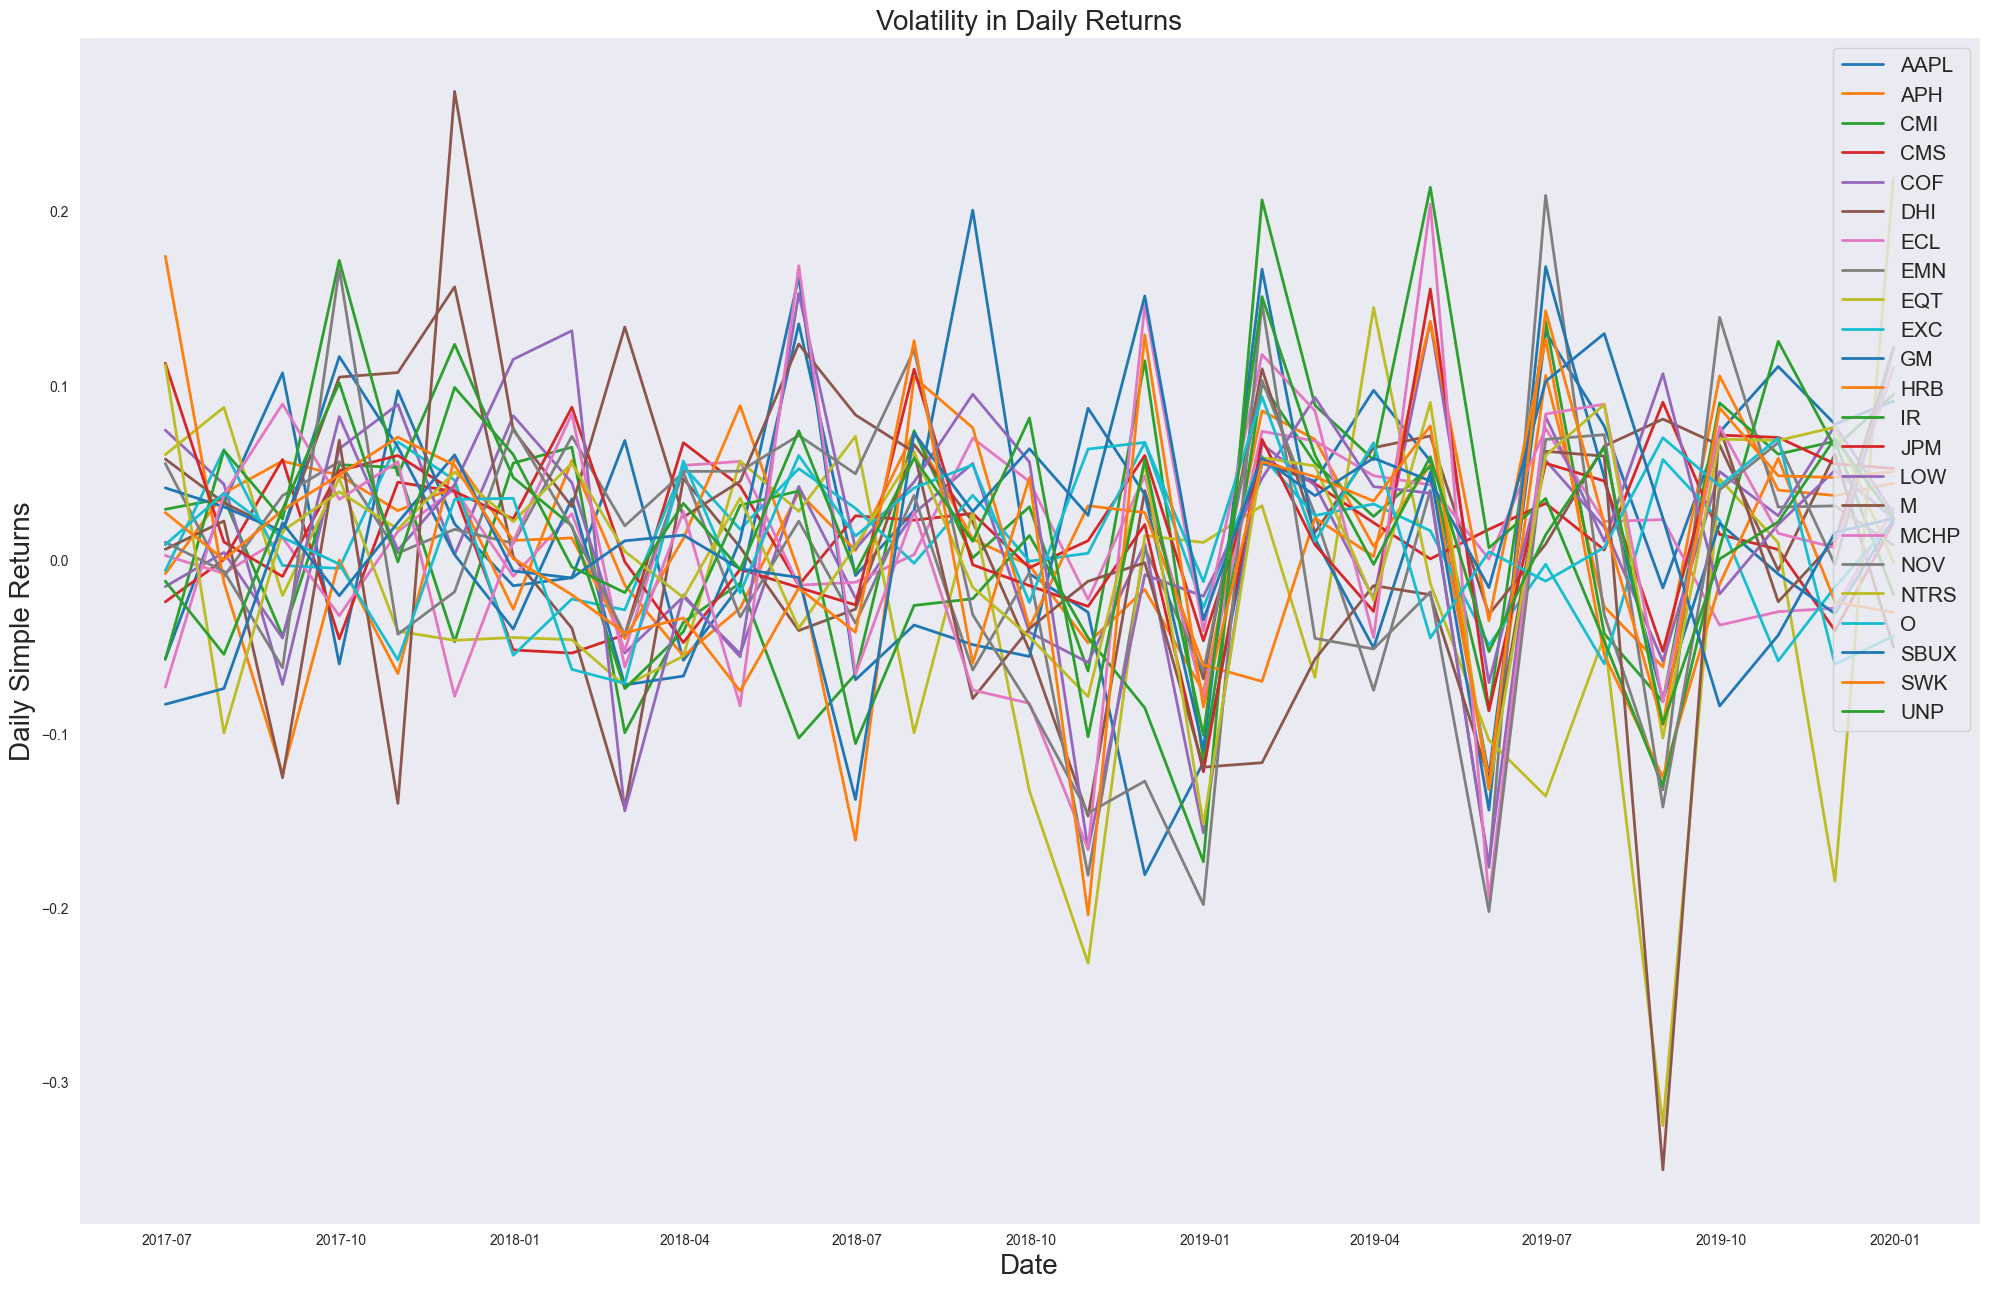

In [5]:
# Plot Retornos 
fig = plt.figure(figsize=(20,13))

# add respective plots to figure
for index in returns.columns.values:
    plt.plot(returns[index], lw = 2, label = index)

# plot labelling
plt.title("Volatility in Daily Returns", fontsize = 20)
plt.xlabel("Date",  fontsize = 20)
plt.ylabel("Daily Simple Returns",  fontsize = 20)
plt.legend(loc = "upper right", fontsize = 15)

# little margin for plot
plt.tight_layout()

##### Resumen Estadístico Retornos Históricos

In [6]:
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,31.0,0.025730,0.084078,-0.181197,-0.015854,0.032703,0.084184,0.200422
APH,31.0,0.014389,0.054495,-0.126155,-0.022369,0.027883,0.051175,0.105478
CMI,31.0,0.008897,0.070198,-0.115318,-0.045769,0.028662,0.057752,0.136509
CMS,31.0,0.012054,0.038346,-0.053911,-0.009905,0.017167,0.040389,0.090133
COF,31.0,0.012723,0.062588,-0.157114,-0.032297,0.026297,0.055846,0.136370
DHI,31.0,0.018855,0.069870,-0.147464,-0.030159,0.021452,0.065207,0.156439
ECL,31.0,0.013633,0.040009,-0.079132,-0.014074,0.015939,0.046259,0.075005
EMN,31.0,0.004914,0.080361,-0.181467,-0.032508,0.017178,0.038076,0.208962
EQT,31.0,-0.026470,0.107695,-0.325305,-0.070305,-0.020882,0.038459,0.218786


##### Histograma y Scatterplot Retornos Historicos

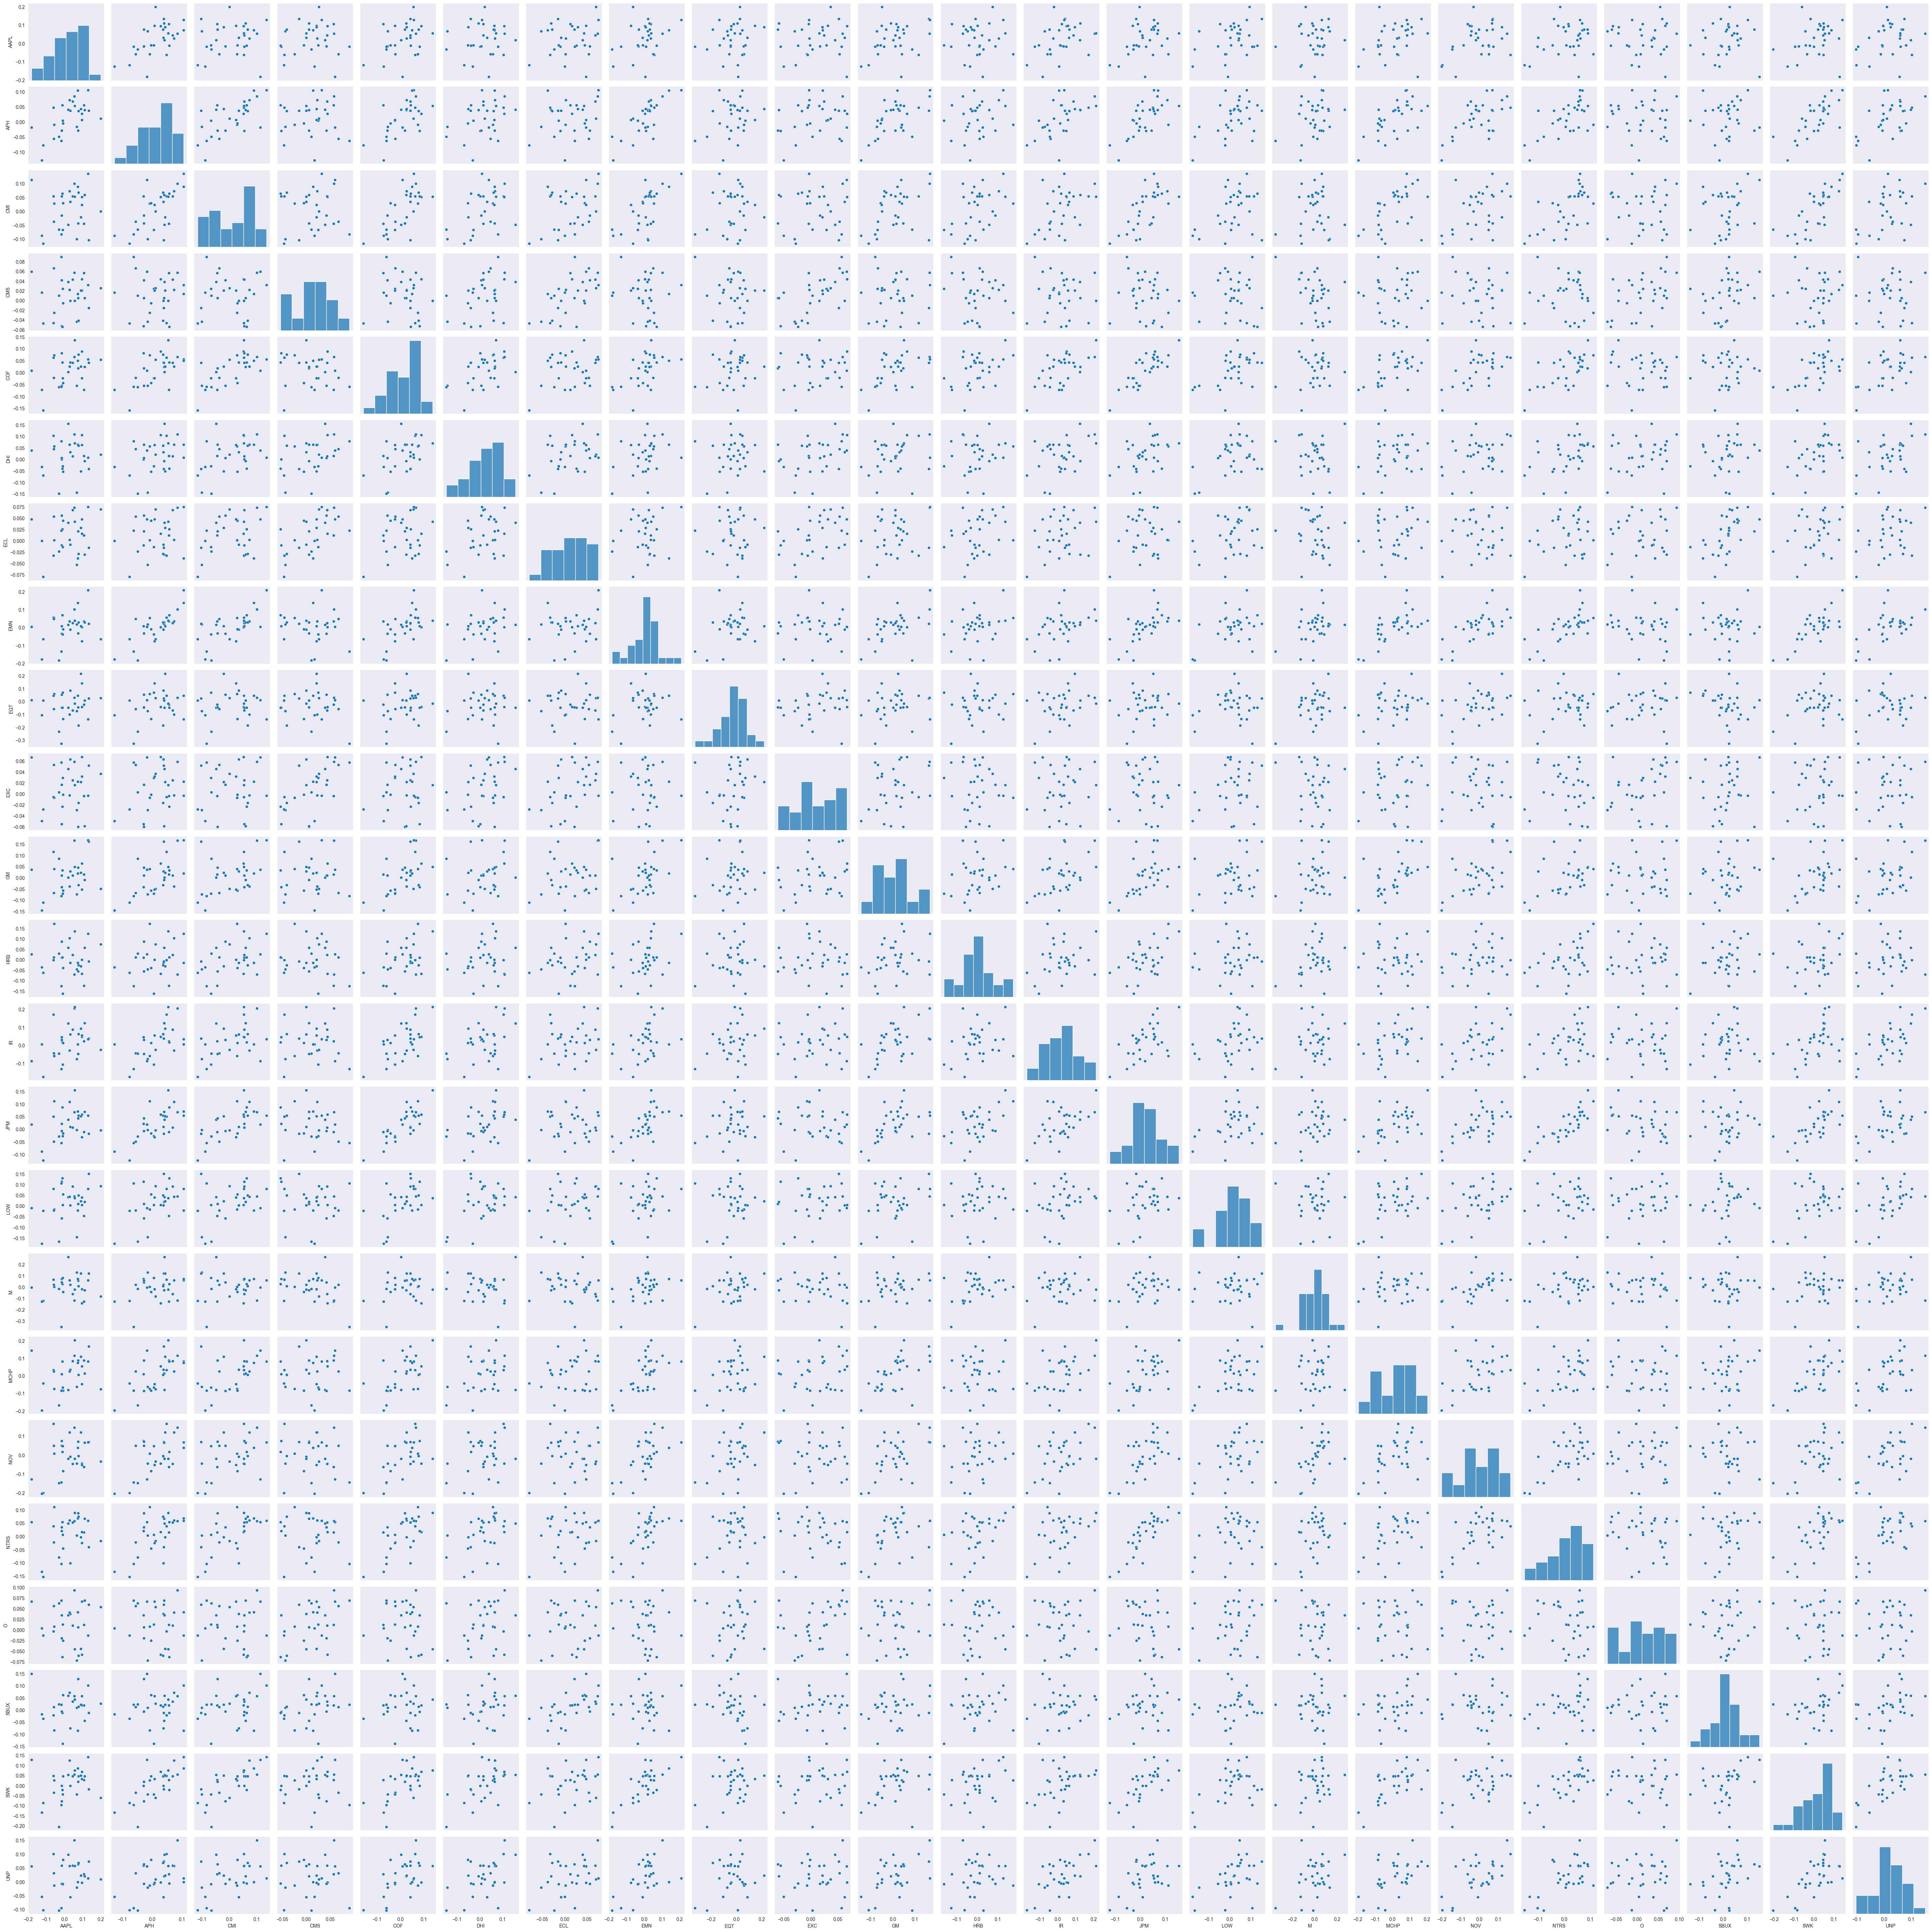

In [7]:
# Diagrama de Dispersion e Histograma de Retornos 
sns.pairplot(returns)
plt.show()

##### Matriz de Correlación Retornos Históricos

In [8]:
corr_matrix = returns.corr(method = "pearson")
corr_matrix

Ticker,AAPL,APH,CMI,CMS,COF,DHI,ECL,EMN,EQT,EXC,...,JPM,LOW,M,MCHP,NOV,NTRS,O,SBUX,SWK,UNP
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.590807,0.128731,0.064295,0.391273,0.090510,0.191099,0.309563,0.141643,0.069633,...,0.314133,0.339442,0.117479,0.297279,0.387269,0.275855,-0.043206,0.072527,0.261871,0.228493
APH,0.590807,1.000000,0.645531,0.017927,0.620614,0.345093,0.211834,0.784875,0.257621,0.219653,...,0.693640,0.482132,0.314788,0.634023,0.607722,0.620559,-0.057744,0.059313,0.729455,0.527591
CMI,0.128731,0.645531,1.000000,0.022547,0.688284,0.438514,0.364265,0.644988,0.105589,0.092434,...,0.681589,0.382011,0.056096,0.466110,0.411710,0.627192,0.018606,0.245757,0.747182,0.463473
CMS,0.064295,0.017927,0.022547,1.000000,-0.144416,0.365829,0.616735,-0.091699,-0.116932,0.611240,...,-0.148039,-0.072252,-0.369808,0.042048,-0.113673,-0.041392,0.465690,0.332306,0.085631,0.014885
COF,0.391273,0.620614,0.688284,-0.144416,1.000000,0.488394,0.261120,0.555681,0.187959,0.147868,...,0.819474,0.518351,0.239873,0.566095,0.586318,0.670280,-0.085460,0.052611,0.587716,0.546595
DHI,0.090510,0.345093,0.438514,0.365829,0.488394,1.000000,0.366367,0.318705,0.092533,0.379817,...,0.420388,0.404327,-0.066814,0.288707,0.318783,0.436972,0.232766,0.194270,0.542309,0.482103
ECL,0.191099,0.211834,0.364265,0.616735,0.261120,0.366367,1.000000,0.173011,0.031850,0.434643,...,0.172588,0.314096,-0.108026,0.210121,0.131134,0.263859,0.162719,0.561180,0.284751,0.379258
EMN,0.309563,0.784875,0.644988,-0.091699,0.555681,0.318705,0.173011,1.000000,0.231266,0.054862,...,0.626967,0.403778,0.384768,0.649194,0.641398,0.679416,-0.167661,0.052345,0.769054,0.554766
EQT,0.141643,0.257621,0.105589,-0.116932,0.187959,0.092533,0.031850,0.231266,1.000000,0.155996,...,0.163266,0.060890,0.387340,0.314858,0.411550,0.176178,0.014612,-0.280837,0.263673,0.200036


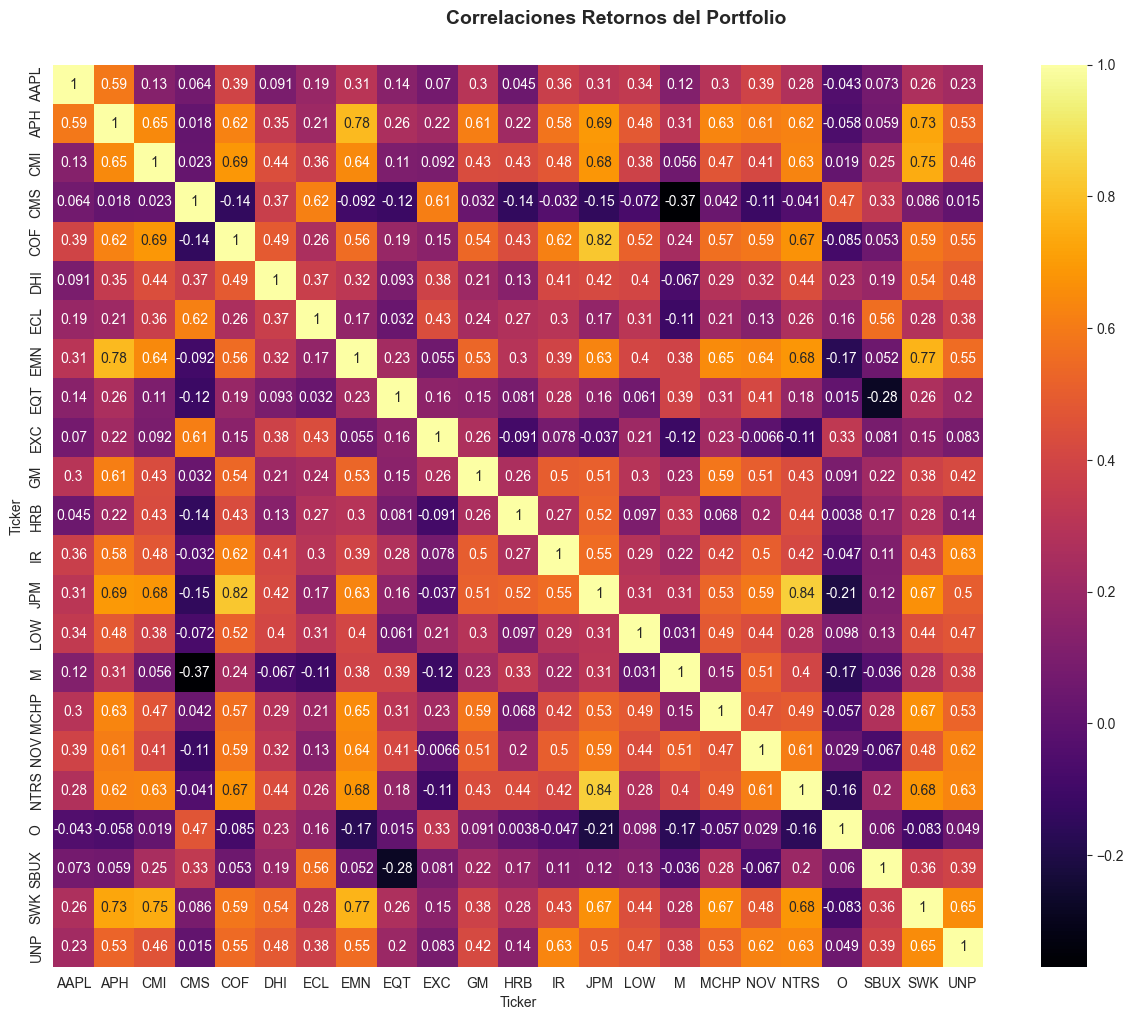

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
corr = returns.corr()
sns.heatmap(corr, ax = ax, cmap = 'inferno', annot = True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Retornos del Portfolio', fontsize = 14, fontweight = 'bold')
plt.show()

In [10]:
def filtrar_baja_correlacion(returns, umbral = 0.3):
    """
    Filtra activos que tengan baja correlación promedio con el resto del portafolio.
    Devuelve una lista de tickers seleccionados.
    
    Parámetros:
    - returns: DataFrame de retornos de los activos (columnas = tickers)
    - umbral: valor máximo de correlación promedio para incluir el activo
    
    Retorna:
    - Lista de tickers con baja correlación promedio
    """
    corr = returns.corr().abs()
    # Calcula la correlación promedio de cada activo con el resto (excluyendo la diagonal)
    corr_promedio = (corr.sum() - 1) / (len(corr) - 1)
    # Selecciona activos cuya correlación promedio es menor o igual al umbral
    seleccionados = corr_promedio[corr_promedio <= umbral].index.tolist()
    return seleccionados

In [11]:
tickers_baja_corr = filtrar_baja_correlacion(returns, umbral = 0.3)
tickers_baja_corr

['AAPL', 'CMS', 'ECL', 'EQT', 'EXC', 'HRB', 'LOW', 'M', 'O', 'SBUX']

##### Boxplot Retornos Históricos

In [12]:
returns_filter = returns[tickers_baja_corr]

<Axes: title={'center': 'Risk Box Plot'}>

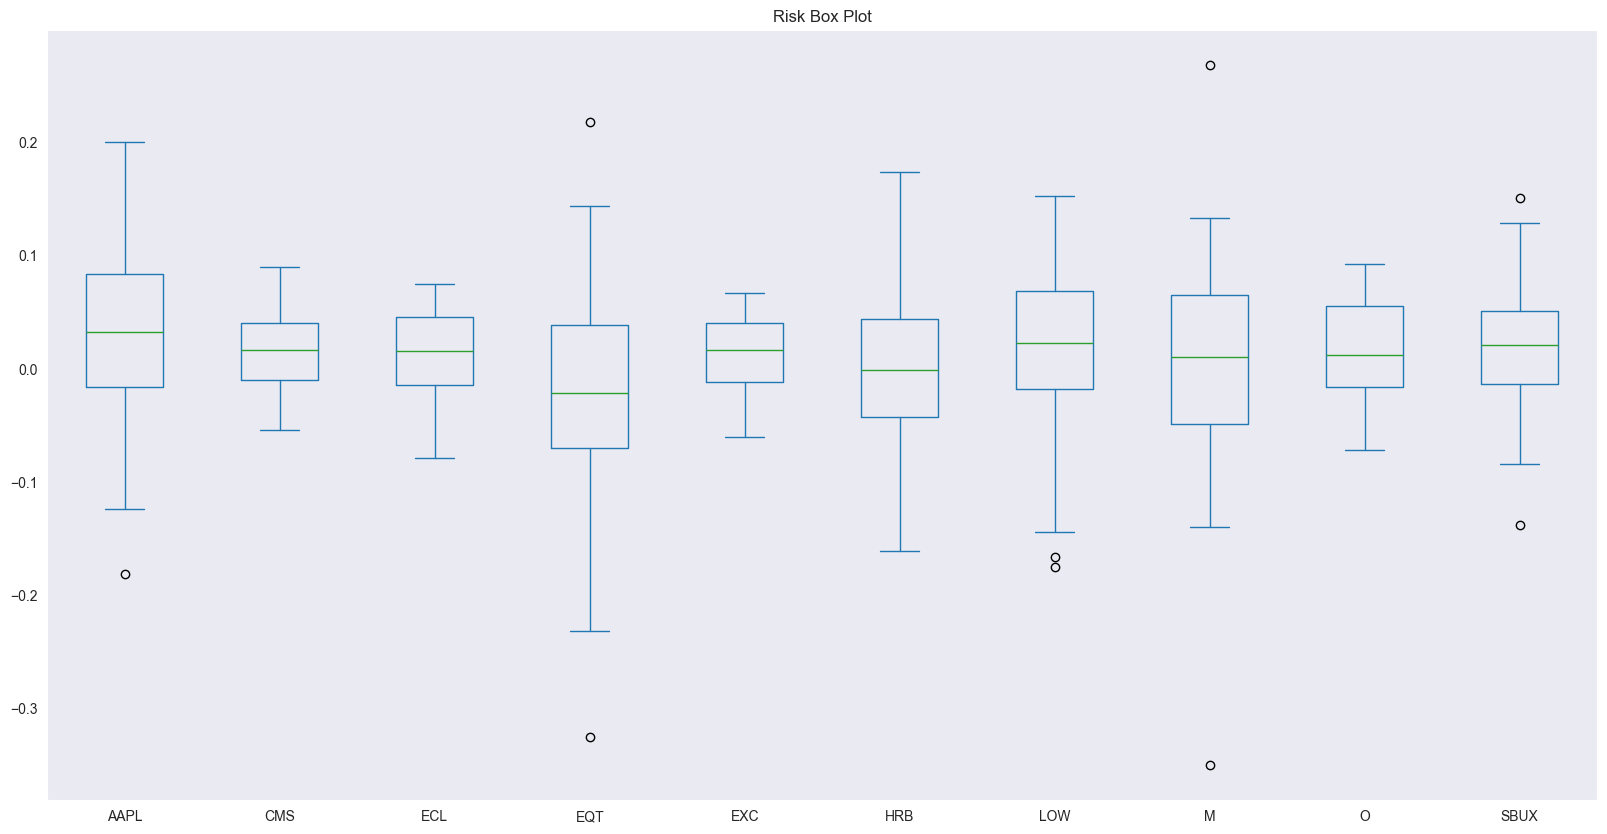

In [13]:
# Boxplots Retornos 
returns_filter.plot(kind = "box", figsize = (20,10), title = "Risk Box Plot")

##### Clustering

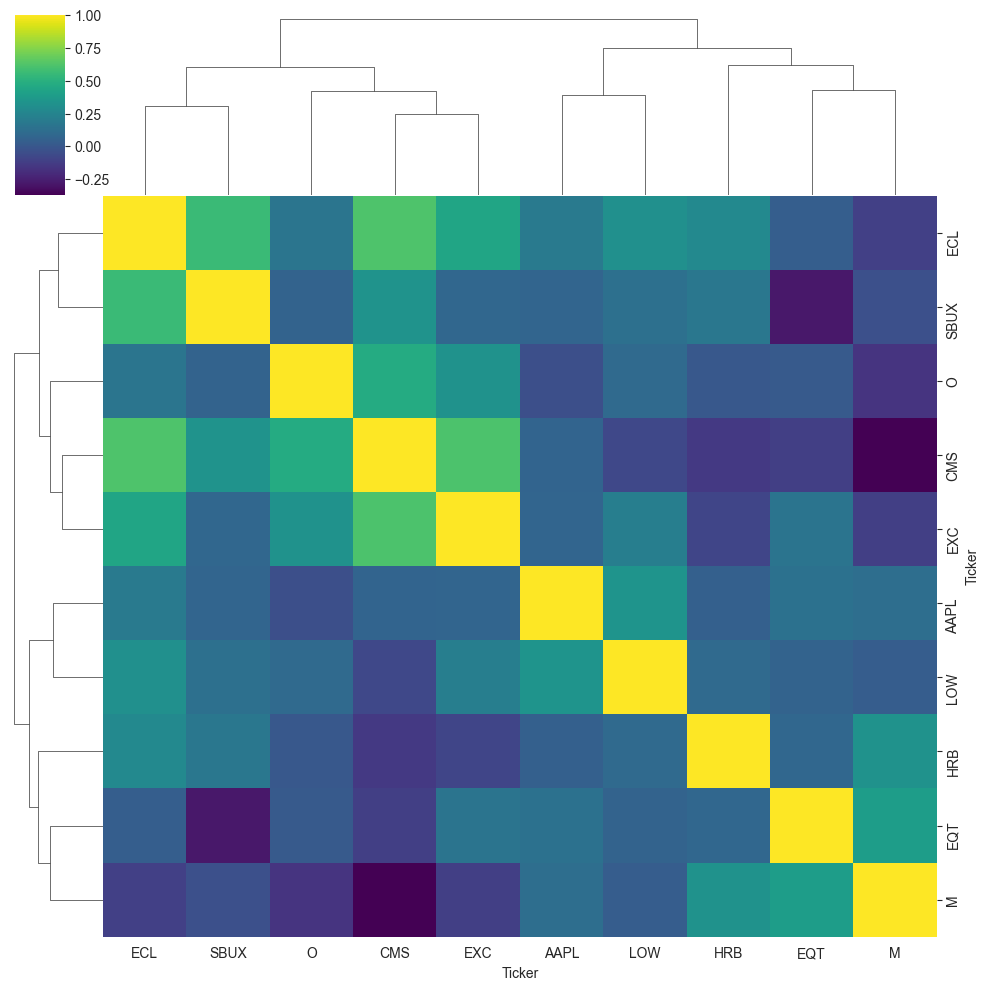

In [14]:
# Dendrograma / Correlaciones 
g = sns.clustermap( 
    returns_filter.corr(),
    cmap = "viridis",
    dendrogram_ratio = (.1, .2)
)
plt.show()

##### Implementacion Enfoques de Optimizacion

In [15]:
import cvxpy as cp

In [16]:
# Calcula el vector de medias y la matriz de covarianzas de los retornos
mu = returns_filter.mean().values           # Retorno promedio de cada activo
Sigma = returns_filter.cov().values         # Matriz de covarianza de retornos
n = len(mu)                          # Número de activos

In [17]:
# Variable de decisión: pesos del portafolio
w = cp.Variable(n)


In [18]:
# Define el retorno mínimo deseado (puedes ajustar este valor)
target_return = 0.02  # 2% mensual, por ejemplo

In [19]:
# Restricciones: suma de pesos = 1, no short-selling, retorno >= target
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    mu @ w >= target_return
]

In [20]:
# Función objetivo: minimizar el riesgo (varianza del portafolio)
risk = cp.quad_form(w, Sigma)
objective = cp.Minimize(risk)

# Define y resuelve el problema
problem = cp.Problem(objective, constraints)
problem.solve()

# Resultados
print("Pesos óptimos del portafolio:")
for ticker, peso in zip(returns.columns, w.value):
    print(f"{ticker}: {peso:.4f}")

print(f"\nRiesgo mínimo (desviación estándar): {np.sqrt(risk.value):.4f}")
print(f"Retorno esperado del portafolio: {mu @ w.value:.4f}")

Pesos óptimos del portafolio:
AAPL: 0.4851
APH: -0.0000
CMI: 0.0000
CMS: -0.0000
COF: -0.0000
DHI: -0.0000
ECL: 0.0822
EMN: -0.0000
EQT: 0.3346
EXC: 0.0981

Riesgo mínimo (desviación estándar): 0.0467
Retorno esperado del portafolio: 0.0200
